<a href="https://colab.research.google.com/github/Rishul2003/Network-traffic-classification/blob/main/Network_traffic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [74]:
filepath = "/content/Dataset-Unicauca-Version2-87Atts.csv"
df = pd.read_csv(filepath)
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523.0,22.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131.0,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131.0,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7.0,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7.0,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131.0,HTTP_PROXY


In [75]:
df.tail()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
27625,130.14.29.110-10.200.7.195-443-35953-6,10.200.7.195,35953,130.14.29.110,443,6,26/04/201711:13:13,30350235.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91.0,SSL
27626,130.14.29.110-10.200.7.195-443-35953-6,10.200.7.195,35953,130.14.29.110,443,6,26/04/201711:13:43,241.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91.0,SSL
27627,192.168.130.16-10.200.7.5-51983-3128-6,192.168.130.16,51983,10.200.7.5,3128,6,26/04/201711:13:13,30354324.0,7.0,42.0,...,0.0,521849.0,521849.0,29832475.0,0.0,29832475.0,29832475.0,BENIGN,130.0,HTTP_CONNECT
27628,192.168.130.16-10.200.7.5-51983-3128-6,10.200.7.5,3128,192.168.130.16,51983,6,26/04/201711:13:43,91.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7.0,HTTP
27629,10.200.7.194-104.91.156.236-55926-80-6,10.200.7.194,55926,104.91.156.236,80,6,26/04/201,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
def ip2int(ip):
    if isinstance(ip, str):
        packedIP = socket.inet_aton(ip)
        return struct.unpack("!L", packedIP)[0]
    else:
        return None

In [77]:
df['Source.IP'] = df['Source.IP'].astype(str)
df['Destination.IP'] = df['Destination.IP'].astype(str)
# Apply the function to the columns
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [78]:
df.isnull().values.any()

True

In [79]:
df['ProtocolName'].value_counts()

ProtocolName
HTTP              9551
GOOGLE            4458
HTTP_PROXY        3678
SSL               3121
HTTP_CONNECT      2731
YOUTUBE           1458
AMAZON             494
WINDOWS_UPDATE     458
MICROSOFT          406
YAHOO              248
FACEBOOK           238
CONTENT_FLASH      204
GMAIL              125
SKYPE               91
MSN                 80
DROPBOX             60
TWITTER             53
CLOUDFLARE          51
WIKIPEDIA           35
OFFICE_365          25
SSL_NO_CERT         20
MS_ONE_DRIVE        14
APPLE_ICLOUD         8
HTTP_DOWNLOAD        6
TOR                  5
APPLE_ITUNES         3
MSSQL                2
DNS                  2
UBUNTUONE            1
OPENSIGNAL           1
WHATSAPP             1
FTP_DATA             1
Name: count, dtype: int64

In [80]:
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['WINDOWS_UPDATE', 'MICROSOFT', 'YAHOO', 'FACEBOOK', 'CONTENT_FLASH',
       'GMAIL', 'SKYPE', 'MSN', 'DROPBOX', 'TWITTER', 'CLOUDFLARE',
       'WIKIPEDIA', 'OFFICE_365', 'SSL_NO_CERT', 'MS_ONE_DRIVE',
       'APPLE_ICLOUD', 'HTTP_DOWNLOAD', 'TOR', 'APPLE_ITUNES', 'MSSQL', 'DNS',
       'UBUNTUONE', 'OPENSIGNAL', 'WHATSAPP', 'FTP_DATA'],
      dtype='object', name='ProtocolName')

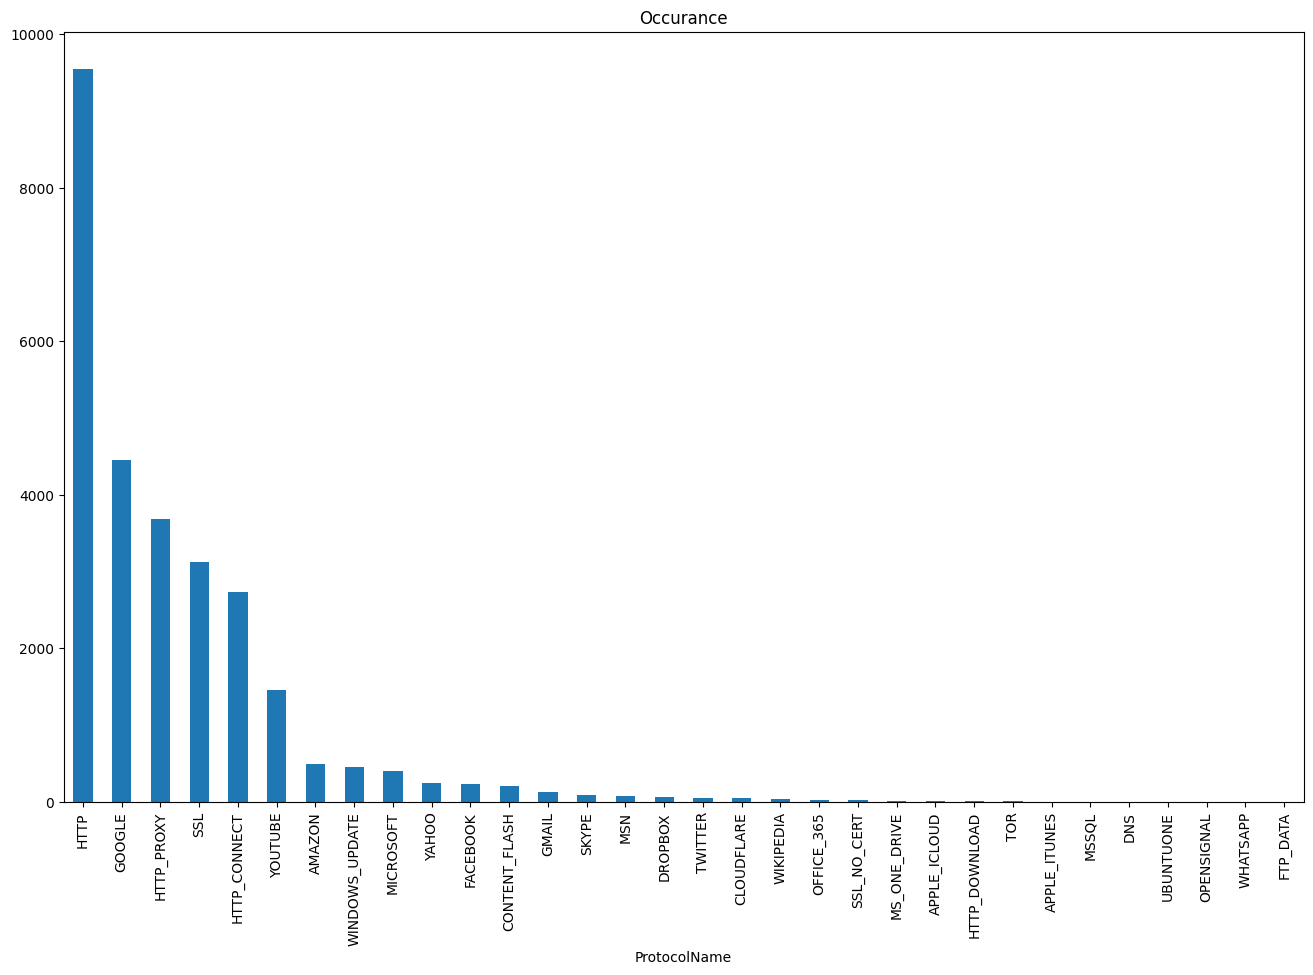

In [81]:
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [93]:
df = df.drop(columns=['Flow.ID', 'Timestamp', 'Label'])

In [94]:
feats = [x for x in df.columns if x != 'ProtocolName']

In [95]:
df = df[~df.ProtocolName.isin(feats_toDelete)]

In [96]:
feats

['Source.IP',
 'Source.Port',
 'Destination.IP',
 'Destination.Port',
 'Protocol',
 'Flow.Duration',
 'Total.Fwd.Packets',
 'Total.Backward.Packets',
 'Total.Length.of.Fwd.Packets',
 'Total.Length.of.Bwd.Packets',
 'Fwd.Packet.Length.Max',
 'Fwd.Packet.Length.Min',
 'Fwd.Packet.Length.Mean',
 'Fwd.Packet.Length.Std',
 'Bwd.Packet.Length.Max',
 'Bwd.Packet.Length.Min',
 'Bwd.Packet.Length.Mean',
 'Bwd.Packet.Length.Std',
 'Flow.Bytes.s',
 'Flow.Packets.s',
 'Flow.IAT.Mean',
 'Flow.IAT.Std',
 'Flow.IAT.Max',
 'Flow.IAT.Min',
 'Fwd.IAT.Total',
 'Fwd.IAT.Mean',
 'Fwd.IAT.Std',
 'Fwd.IAT.Max',
 'Fwd.IAT.Min',
 'Bwd.IAT.Total',
 'Bwd.IAT.Mean',
 'Bwd.IAT.Std',
 'Bwd.IAT.Max',
 'Bwd.IAT.Min',
 'Fwd.PSH.Flags',
 'Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags',
 'Fwd.Header.Length',
 'Bwd.Header.Length',
 'Fwd.Packets.s',
 'Bwd.Packets.s',
 'Min.Packet.Length',
 'Max.Packet.Length',
 'Packet.Length.Mean',
 'Packet.Length.Std',
 'Packet.Length.Variance',
 'FIN.Flag.Count',
 'SYN.Flag.Count',

In [97]:
df[feats]

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
0,2886926638,52422,180881159,3128,6,45523.0,22.0,55.0,132.0,110414.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
1,180881159,3128,2886926638,52422,6,1.0,2.0,0.0,12.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
2,840939815,80,180881369,38848,6,1.0,3.0,0.0,674.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,840939815,80,180881369,38848,6,217.0,1.0,3.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,3232253995,55961,180881159,3128,6,78068.0,5.0,0.0,1076.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27625,180881347,35953,2181963118,443,6,30350235.0,8.0,7.0,643.0,3310.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0
27626,180881347,35953,2181963118,443,6,241.0,2.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0
27627,3232268816,51983,180881157,3128,6,30354324.0,7.0,42.0,891.0,16872.0,...,20.0,521849.0,0.0,521849.0,521849.0,29832475.0,0.0,29832475.0,29832475.0,130.0
27628,180881157,3128,3232268816,51983,6,91.0,4.0,0.0,74.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [98]:

X = df[feats].astype(float)
Y = df['ProtocolName']

In [99]:
Y

0          HTTP_PROXY
1          HTTP_PROXY
2                HTTP
3                HTTP
4          HTTP_PROXY
             ...     
27625             SSL
27626             SSL
27627    HTTP_CONNECT
27628            HTTP
27629             NaN
Name: ProtocolName, Length: 25492, dtype: object

In [100]:
new_dataframe = pd.DataFrame(data = X, columns = feats)

In [101]:
new_dataframe['ProtocolName'] = Y

In [102]:
new_dataframe.describe()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,2.549200e+04,25492.000000,2.549200e+04,25492.000000,25492.000000,2.549100e+04,25491.000000,25491.000000,2.549100e+04,2.549100e+04,...,25491.000000,2.549100e+04,2.549100e+04,2.549100e+04,2.549100e+04,2.549100e+04,2.549100e+04,2.549100e+04,2.549100e+04,25491.000000
mean,1.188875e+09,30767.072925,1.907925e+09,18106.925977,6.001726,9.928671e+06,40.354557,50.805853,3.018853e+04,7.725391e+04,...,24.675376,1.054247e+05,5.686506e+04,1.838965e+05,6.358466e+04,2.231717e+06,3.675193e+05,2.594384e+06,1.898907e+06,79.171002
std,1.421091e+09,23865.889683,1.418249e+09,23961.792419,0.137783,2.466893e+07,444.442192,909.020137,6.471701e+05,1.781597e+06,...,5.852605,1.125002e+06,5.702807e+05,1.644236e+06,1.021821e+06,8.894043e+06,2.443132e+06,1.002771e+07,8.226136e+06,57.627874
min,1.354038e+08,80.000000,6.817647e+07,53.000000,6.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000
25%,1.808812e+08,3128.000000,1.808812e+08,443.000000,6.000000,1.640000e+02,2.000000,0.000000,1.200000e+01,0.000000e+00,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000
50%,1.808814e+08,41152.000000,2.886927e+09,3128.000000,6.000000,2.374390e+05,5.000000,3.000000,4.900000e+02,1.200000e+01,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,124.000000
75%,3.232244e+09,52245.000000,3.232246e+09,50114.000000,6.000000,5.028584e+06,13.000000,17.000000,1.834000e+03,4.333500e+03,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,130.000000
max,3.642006e+09,65464.000000,3.641540e+09,65464.000000,17.000000,1.199998e+08,40334.000000,134456.000000,5.177809e+07,2.581577e+08,...,40.000000,1.013416e+08,3.077333e+07,1.013416e+08,1.013416e+08,1.157087e+08,7.025779e+07,1.157087e+08,1.157087e+08,178.000000


In [106]:
print(df.columns)

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std'

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
new_dataframe.to_csv('processedata.csv', index=False)

In [113]:
df = pd.read_csv('/content/processedata.csv')

In [114]:
df = df.dropna()

In [115]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats]
Y = df['ProtocolName']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [117]:

dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [118]:
dt.score(X_test, y_test)

1.0

In [119]:

rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [120]:
df

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,2.886927e+09,52422.0,1.808812e+08,3128.0,6.0,45523.0,22.0,55.0,132.0,110414.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,131.0,HTTP_PROXY
1,1.808812e+08,3128.0,2.886927e+09,52422.0,6.0,1.0,2.0,0.0,12.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,131.0,HTTP_PROXY
2,8.409398e+08,80.0,1.808814e+08,38848.0,6.0,1.0,3.0,0.0,674.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,7.0,HTTP
3,8.409398e+08,80.0,1.808814e+08,38848.0,6.0,217.0,1.0,3.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,7.0,HTTP
4,3.232254e+09,55961.0,1.808812e+08,3128.0,6.0,78068.0,5.0,0.0,1076.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25486,3.232269e+09,51113.0,1.808812e+08,3128.0,6.0,90919205.0,19.0,95.0,2381.0,5785.0,...,227027.5,320765.556256,453843.0,212.0,45232408.5,104228.246654,45306109.0,45158708.0,126.0,GOOGLE
25487,1.808813e+08,35953.0,2.181963e+09,443.0,6.0,30350235.0,8.0,7.0,643.0,3310.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,91.0,SSL
25488,1.808813e+08,35953.0,2.181963e+09,443.0,6.0,241.0,2.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,91.0,SSL
25489,3.232269e+09,51983.0,1.808812e+08,3128.0,6.0,30354324.0,7.0,42.0,891.0,16872.0,...,521849.0,0.000000,521849.0,521849.0,29832475.0,0.000000,29832475.0,29832475.0,130.0,HTTP_CONNECT


In [121]:
rf.score(X_test, y_test)

0.991239539748954